In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('data.csv')
df.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,NaN,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,Just not interested! (Want to work in the corp...,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,Not willing to start a venture in India and wa...,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,Not able to take a Financial Risk,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,NaN,1


In [4]:
df.isnull().sum()

EducationSector            0
IndividualProject          0
Age                        0
Gender                     0
City                       0
Influenced                 0
Perseverance               0
DesireToTakeInitiative     0
Competitiveness            0
SelfReliance               0
StrongNeedToAchieve        0
SelfConfidence             0
GoodPhysicalHealth         0
MentalDisorder             0
KeyTraits                  0
ReasonsForLack            91
y                          0
dtype: int64

<AxesSubplot:>

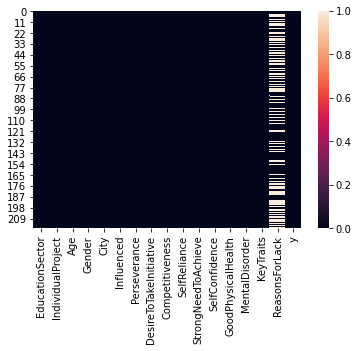

In [5]:
import seaborn as sns
sns.heatmap(df.isnull())

In [6]:
featur_with_na=[feature for feature in df.columns if df[feature].isnull().sum()>= 1]

In [7]:
featur_with_na

['ReasonsForLack']

In [8]:
for feature in featur_with_na:
    print("{}: {} %missing vallue".format(feature,np.round(df[feature].isnull().mean(),4)))

ReasonsForLack: 0.4155 %missing vallue


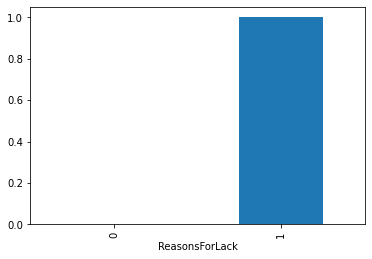

In [9]:
for feature in featur_with_na:
    data=df.copy()
    data[feature]=np.where(data[feature].isnull(),1,0)
    data.groupby(feature)['y'].median().plot.bar()

In [10]:
numerical_feat = [feature for feature in df.columns if df[feature].dtypes != 'O']

In [11]:
numerical_feat

['Age',
 'Perseverance',
 'DesireToTakeInitiative',
 'Competitiveness',
 'SelfReliance',
 'StrongNeedToAchieve',
 'SelfConfidence',
 'GoodPhysicalHealth',
 'y']

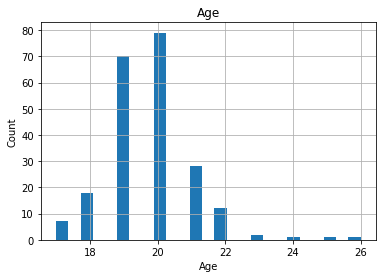

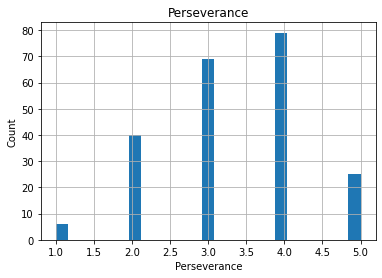

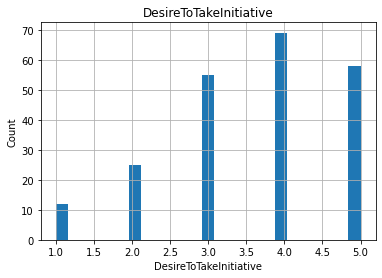

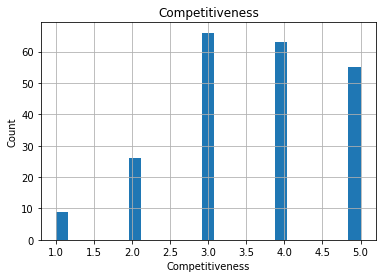

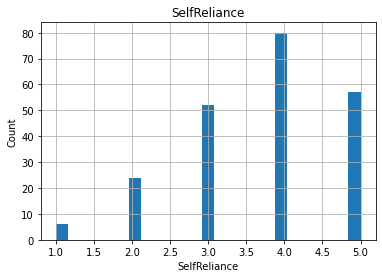

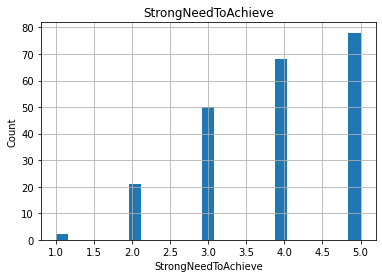

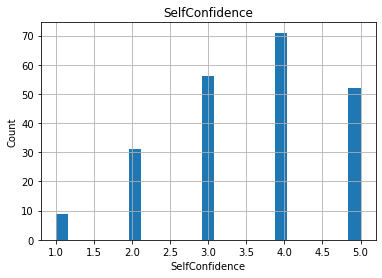

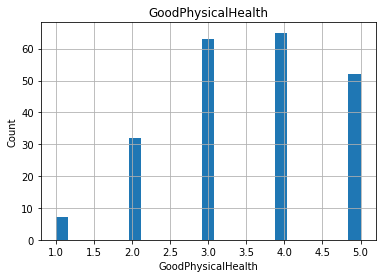

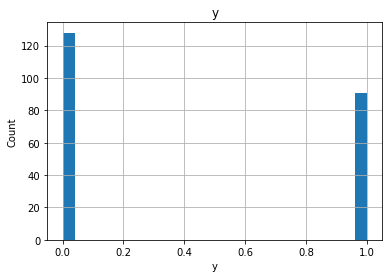

In [12]:
for feature in numerical_feat:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

## Discrit Feature

In [13]:
discrit_feature = [feature for feature in numerical_feat if len(df[feature].unique())<25]

In [14]:
discrit_feature

['Age',
 'Perseverance',
 'DesireToTakeInitiative',
 'Competitiveness',
 'SelfReliance',
 'StrongNeedToAchieve',
 'SelfConfidence',
 'GoodPhysicalHealth',
 'y']

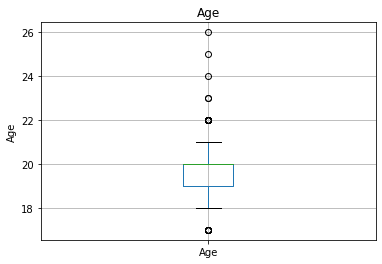

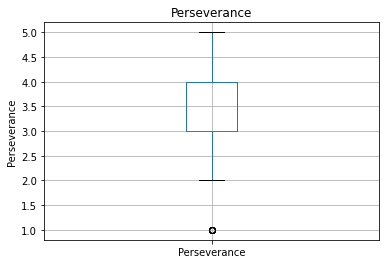

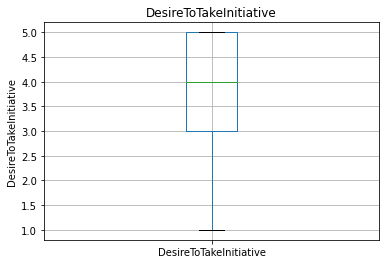

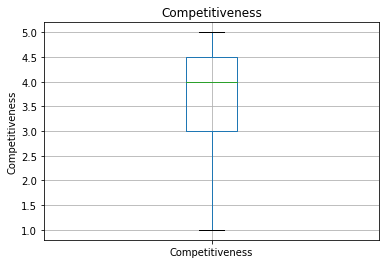

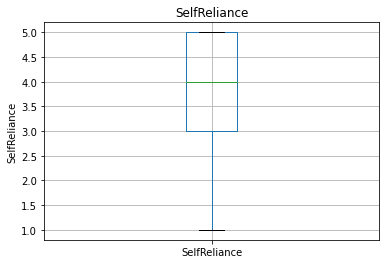

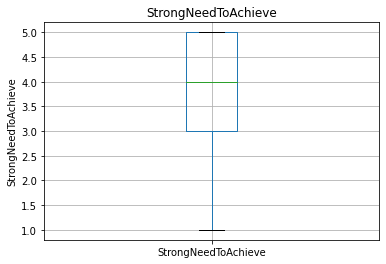

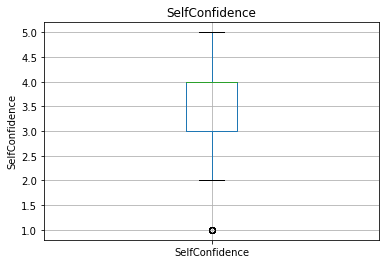

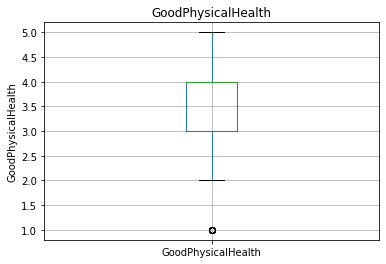

In [15]:
for feature in discrit_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [16]:
cat_feat = [feature for feature in df.columns if df[feature].dtypes == 'O']
cat_feat

['EducationSector',
 'IndividualProject',
 'Gender',
 'City',
 'Influenced',
 'MentalDisorder',
 'KeyTraits',
 'ReasonsForLack']

In [17]:
for feature in cat_feat:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is EducationSector and number of categories are 9
The feature is IndividualProject and number of categories are 2
The feature is Gender and number of categories are 2
The feature is City and number of categories are 2
The feature is Influenced and number of categories are 2
The feature is MentalDisorder and number of categories are 2
The feature is KeyTraits and number of categories are 5
The feature is ReasonsForLack and number of categories are 45


In [21]:
df.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,NaN,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,Just not interested! (Want to work in the corp...,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,Not willing to start a venture in India and wa...,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,Not able to take a Financial Risk,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,NaN,1


In [22]:
df.drop(['ReasonsForLack'], axis=1, inplace=True)

In [23]:
df.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,1


In [26]:
cati_feature = [feature for feature in df.columns if df[feature].dtypes == "O"]
for feature in cati_feature:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is EducationSector and number of categories are 9
The feature is IndividualProject and number of categories are 2
The feature is Gender and number of categories are 2
The feature is City and number of categories are 2
The feature is Influenced and number of categories are 2
The feature is MentalDisorder and number of categories are 2
The feature is KeyTraits and number of categories are 5


In [28]:
for feature in cati_feature:
    temp=df.groupby(feature)['y'].count()/len(df)
    temp_df=temp[temp>0.01].index
    df[feature]=np.where(df[feature].isin(temp_df),df[feature],'Rare_char')

In [30]:
df['EducationSector'].unique()

array(['Engineering Sciences', 'Others',
       'Economic Sciences, Business Studies, Commerce and Law',
       'Art, Music or Design', 'Humanities and Social Sciences',
       'Medicine, Health Sciences', 'Teaching Degree (e.g., B.Ed)',
       'Mathematics or Natural Sciences', 'Rare_char'], dtype=object)

In [35]:
ordinal= df.groupby(df['EducationSector'])['y'].mean().sort_values().index

In [38]:
ordinal_label={k:i for i,k in enumerate(ordinal,0)}
ordinal_label

{'Mathematics or Natural Sciences': 0,
 'Rare_char': 1,
 'Economic Sciences, Business Studies, Commerce and Law': 2,
 'Medicine, Health Sciences': 3,
 'Others': 4,
 'Art, Music or Design': 5,
 'Engineering Sciences': 6,
 'Teaching Degree (e.g., B.Ed)': 7,
 'Humanities and Social Sciences': 8}

In [40]:
df['EducationSector']=df['EducationSector'].map(ordinal_label)

In [46]:
last_cat_feat = [feature for feature in df.columns if df[feature].dtypes == 'O']

In [49]:
for feature in last_cat_feat:
    df[feature]=pd.get_dummies(df[feature], drop_first=True)

In [50]:
df.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,y
0,6,0,19,1,1,0,2,2,3,3,2,2,3,1,0,1
1,6,1,22,1,0,1,3,3,3,4,4,3,4,1,0,0
2,6,0,18,1,1,0,3,4,3,3,3,4,4,0,0,0
3,6,1,20,1,1,1,3,3,3,3,4,3,3,0,0,0
4,6,1,19,1,1,1,2,3,3,3,4,3,2,1,0,1


In [56]:
import seaborn as sns


<AxesSubplot:xlabel='EducationSector'>

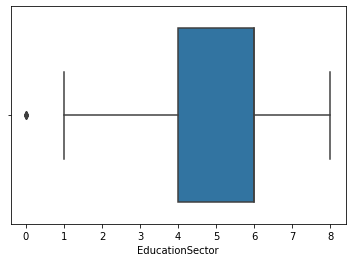

In [57]:
sns.boxplot(x=df['EducationSector'])